# GeoPandas Operations, including importing shapefiles, visualizing multiple layers, reprojecting data to a compatible CRS, performing spatial intersections to extract districts within an area of interest, calculating their areas, and exporting the results as a new shapefile. This workflow highlights efficient geospatial data processing and visualization.

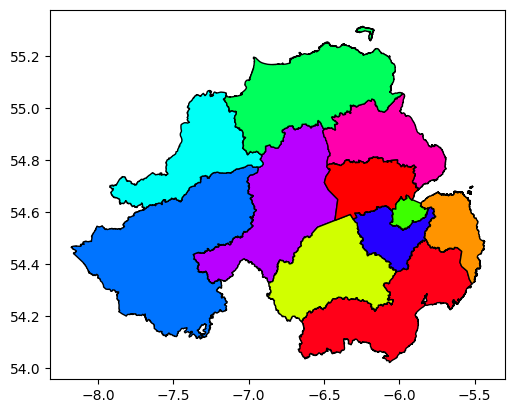

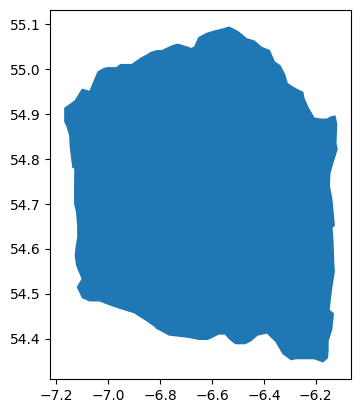

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Importing an ESRI Shapefile and plotting it using GeoPandas
districts = gpd.read_file('Shapefiles\districts.shp')
districts.plot(cmap = 'hsv', edgecolor = 'black', column = 'district')

area_of_interest = gpd.read_file(r'Shapefiles\area_of_interest.shp')
area_of_interest.plot()

atms = gpd.read_file(r'Shapefiles\atms.shp')

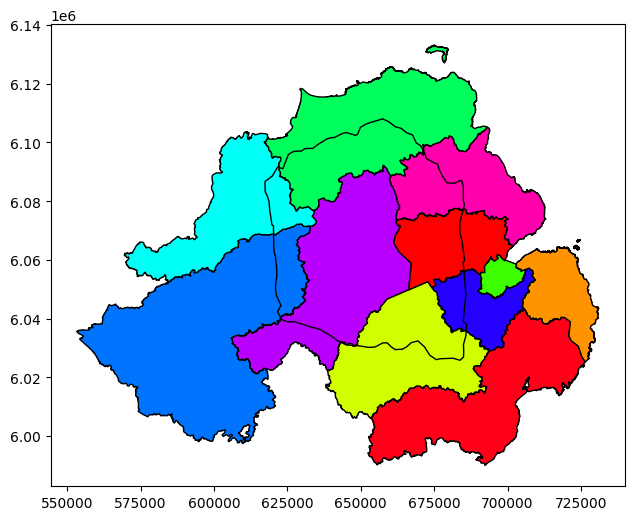

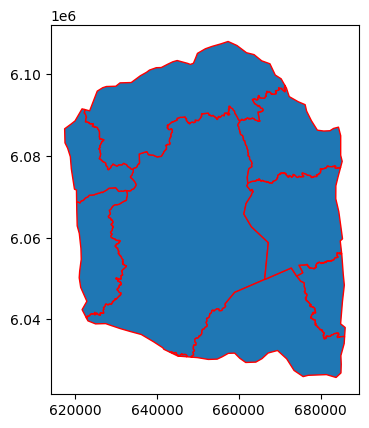

In [15]:
# Reprojecting GeoPandas GeoDataFrames
fig, ax = plt.subplots(figsize=(8,6))
districts = districts.to_crs(epsg=32629)
districts.plot(ax=ax,cmap='hsv', edgecolor='black',column='district')
area_of_interest=area_of_interest.to_crs(epsg = 32629)
area_of_interest.plot(ax = ax,color='none', edgecolor='black')

# Intersecting Layers
districts_in_aoi= gpd.overlay(districts, area_of_interest, how = 'intersection')
districts_in_aoi.plot(edgecolor = 'red')

# Calculating the areas of the intersected layer 
districts_in_aoi['area']=districts_in_aoi.area/1000000

# Exporting GeoPandas GeoDataFrames into an ESRI Shapefile
districts_in_aoi.to_file('districts_within_aoi.shp', driver= "ESRI Shapefile")